## <span style="color:red"> Latent semantic analysis</span>

### <span style="color:red"> Latent semantic analysis avec matrice document terme (CountVectorizer)</span>

In [147]:
# Fonctions de sauvegarde et de chargement de dictionnaires avec des fichiers
# Utilisé pour gagner du temps afin de ne pas avoir à re-exécuter tout
# à chaque ré-ouverture

import pickle

def save_dict(dico, filename) :
    with open("dict/"+filename+".pickle", 'wb') as handle:
        pickle.dump(dico, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
def load_dict(filename) :
    with open("dict/"+filename+".pickle", 'rb') as handle:
        return(pickle.load(handle))

In [148]:
import pandas as pd
import numpy as np
from IPython.display import display

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
# TfidfVectorizer est équivalent à faire un CountVectorizer suivi d'un TfidTransformer

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [149]:
#article_titles = load_dict("cleaned") # dictionnaire tokénisé

In [150]:
#article_titles_str = []
#lst = list(article_titles.values())

#for i in lst:
#    a=" ".join([k for k in i])
#    article_titles_str.append(a)

In [151]:
#save_dict(article_titles_str, "article_titles_str")

In [152]:
article_titles_str=load_dict("article_titles_str")

In [153]:
#matching = [s for s in article_titles_str if '' in s] # test de la présence du mot ..
#matching

In [154]:
article_titles_str[0:2]

['infer social link mobility profile',
 'real time arm skeleton track gesture inference tolerant miss wearable sensor']

In [158]:
vectorizer= CountVectorizer(ngram_range=(2,3))
#vectorizer = TfidfVectorizer(ngram_range=(2,3)) # on va travailler uniquement sur les bigramms et trigramms car prit isolément, les mots n'ont pas vraiment de sens
document_term_matrix = vectorizer.fit_transform(article_titles_str)
#tfidf_matrix=vectorizer.fit_transform(article_titles_str) # matrice tfidf
dictionary = vectorizer.get_feature_names()

In [159]:
document_term_matrix[0:12].todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [161]:
document_term_matrix.shape # On a un total de n mots (bigrams + trigrams) pour 439506 documents 

(439506, 3174073)

In [27]:
#df = pd.DataFrame(bag_of_words[0:12].todense(), columns=names) # on peut visualiser le résultat sous la forme d'un data frame mais cela prend du temps

In [162]:
topic_number = 55 # On choisit arbitrairement un nombre de topic

In [163]:
svd = TruncatedSVD(n_components=topic_number) # on choisit ici le nombre de topics que l'on veut
lsa = svd.fit_transform(document_term_matrix)

In [164]:
topic_col=[]
for i in range(topic_number):
    topic_col.append("topic_"+str(i+1))

In [165]:
topic_encoded_df = pd.DataFrame(lsa,columns=topic_col)

In [167]:
topic_encoded_df[0:3]

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,topic_30,topic_31,topic_32,topic_33,topic_34,topic_35,topic_36,topic_37,topic_38,topic_39,topic_40,topic_41,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49,topic_50,topic_51,topic_52,topic_53,topic_54,topic_55
0,0.000090,-0.000010,-0.000113,0.000014,0.000013,0.000005,0.000289,-0.000002,0.000035,-6.742625e-07,0.000040,0.000024,-0.000007,0.000095,-0.000031,0.000817,0.001386,-0.000067,-0.000041,0.000063,0.000016,-0.000023,-0.000023,-0.000067,-0.000011,0.000006,-0.000006,-9.674906e-07,0.000003,0.000009,0.000011,-0.000056,-0.000014,0.000072,0.000061,0.000136,0.000003,0.000116,0.000031,-0.000052,0.000144,-0.000106,0.000090,0.000172,0.000160,0.000210,0.000164,0.000209,-0.000031,-0.000018,0.000362,-0.000009,0.000196,-0.000319,-0.000294
1,0.014134,0.131898,0.003991,0.900848,-0.390370,-0.093050,-0.023088,-0.023000,-0.004843,-6.533011e-03,-0.020244,-0.019698,-0.012272,-0.010712,-0.012713,-0.010302,0.002956,-0.004215,-0.008396,-0.003686,-0.008910,0.004064,-0.001210,0.000782,-0.004519,0.001976,-0.003936,1.433580e-03,-0.004458,0.003423,-0.001110,-0.011196,-0.008597,-0.002432,-0.006740,-0.000290,-0.003008,-0.004670,0.004960,-0.000279,0.005527,-0.001943,-0.006206,0.001251,-0.003706,-0.004037,0.000209,-0.007176,0.000719,-0.002877,-0.000069,-0.011587,0.000152,-0.008747,0.011266
2,0.002791,0.006401,-0.002233,0.007093,-0.004245,-0.000790,-0.000291,0.000833,0.001189,5.229574e-03,0.000642,-0.000878,-0.000217,-0.000213,0.001042,-0.000058,0.000029,-0.000009,-0.000122,0.000139,-0.002196,-0.000603,-0.002649,0.001912,0.000621,-0.002950,0.001549,1.215830e-03,0.001097,0.001070,0.001281,0.001245,0.036793,0.004142,0.001227,-0.005308,0.000973,0.004651,-0.005412,0.002472,-0.018723,-0.018751,0.014828,0.005293,-0.010119,0.006985,0.012596,0.017418,-0.004976,0.001006,-0.015062,0.011472,-0.020004,-0.035023,0.013698


In [168]:
topic_encoded_df["article_title"]=article_titles_str

In [169]:
topic_encoded_df=topic_encoded_df.set_index('article_title', drop=True)

In [14]:
#topic_encoded_df=topic_encoded_df[['article_title']+topic_col] #on réorganise les colonnes 

In [170]:
topic_encoded_df[0:2]

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,topic_30,topic_31,topic_32,topic_33,topic_34,topic_35,topic_36,topic_37,topic_38,topic_39,topic_40,topic_41,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49,topic_50,topic_51,topic_52,topic_53,topic_54,topic_55
article_title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
infer social link mobility profile,0.000090,-0.000010,-0.000113,0.000014,0.000013,0.000005,0.000289,-0.000002,0.000035,-6.742625e-07,0.000040,0.000024,-0.000007,0.000095,-0.000031,0.000817,0.001386,-0.000067,-0.000041,0.000063,0.000016,-0.000023,-0.000023,-0.000067,-0.000011,0.000006,-0.000006,-9.674906e-07,0.000003,0.000009,0.000011,-0.000056,-0.000014,0.000072,0.000061,0.000136,0.000003,0.000116,0.000031,-0.000052,0.000144,-0.000106,0.000090,0.000172,0.000160,0.000210,0.000164,0.000209,-0.000031,-0.000018,0.000362,-0.000009,0.000196,-0.000319,-0.000294
real time arm skeleton track gesture inference tolerant miss wearable sensor,0.014134,0.131898,0.003991,0.900848,-0.390370,-0.093050,-0.023088,-0.023000,-0.004843,-6.533011e-03,-0.020244,-0.019698,-0.012272,-0.010712,-0.012713,-0.010302,0.002956,-0.004215,-0.008396,-0.003686,-0.008910,0.004064,-0.001210,0.000782,-0.004519,0.001976,-0.003936,1.433580e-03,-0.004458,0.003423,-0.001110,-0.011196,-0.008597,-0.002432,-0.006740,-0.000290,-0.003008,-0.004670,0.004960,-0.000279,0.005527,-0.001943,-0.006206,0.001251,-0.003706,-0.004037,0.000209,-0.007176,0.000719,-0.002877,-0.000069,-0.011587,0.000152,-0.008747,0.011266


In [171]:
topic_encoded_df.index[0]

'infer social link mobility profile'

In [172]:
encoding_matrix = pd.DataFrame(svd.components_,index=topic_col,columns=dictionary).T

In [173]:
encoding_matrix[0:3]

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,topic_30,topic_31,topic_32,topic_33,topic_34,topic_35,topic_36,topic_37,topic_38,topic_39,topic_40,topic_41,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49,topic_50,topic_51,topic_52,topic_53,topic_54,topic_55
0g lte,3.278550e-10,2.968843e-08,1.624502e-09,1.954937e-07,-1.183892e-08,2.217286e-07,6.928059e-08,-8.807712e-09,-1.823820e-09,-2.478516e-09,-9.541225e-09,1.685748e-08,1.239446e-07,1.718494e-08,-1.927789e-08,4.397930e-07,-2.385797e-07,-3.187246e-08,-9.637906e-09,1.661515e-08,-1.333251e-07,3.545082e-08,8.203362e-09,1.849923e-08,-1.255613e-07,2.447526e-07,9.952303e-08,-1.284682e-07,4.699169e-08,9.329294e-08,-1.328095e-08,4.946338e-07,1.081823e-07,-2.760692e-07,3.182928e-08,3.549419e-08,-5.296272e-08,1.177593e-08,-2.062130e-07,-1.176899e-07,-2.838761e-07,3.583694e-08,2.729248e-07,6.415996e-07,9.351269e-07,1.722892e-07,5.175566e-07,-1.754420e-07,2.782235e-07,1.752650e-07,6.890332e-07,-3.567924e-08,-7.695764e-08,9.950427e-08,-3.973778e-07
0g lte mobile,3.278552e-10,2.968845e-08,1.624573e-09,1.954937e-07,-1.183893e-08,2.217286e-07,6.928060e-08,-8.807688e-09,-1.823791e-09,-2.478512e-09,-9.541232e-09,1.685748e-08,1.239446e-07,1.718494e-08,-1.927789e-08,4.397930e-07,-2.385797e-07,-3.187247e-08,-9.637908e-09,1.661515e-08,-1.333251e-07,3.545082e-08,8.203414e-09,1.849923e-08,-1.255613e-07,2.447526e-07,9.952303e-08,-1.284682e-07,4.699169e-08,9.329295e-08,-1.328095e-08,4.946338e-07,1.081823e-07,-2.760692e-07,3.182927e-08,3.549419e-08,-5.296273e-08,1.177593e-08,-2.062130e-07,-1.176899e-07,-2.838761e-07,3.583694e-08,2.729248e-07,6.415996e-07,9.351269e-07,1.722892e-07,5.175566e-07,-1.754421e-07,2.782235e-07,1.752650e-07,6.890332e-07,-3.567924e-08,-7.695763e-08,9.950426e-08,-3.973778e-07
0g search,5.202290e-11,2.809053e-08,-4.541109e-09,-7.028610e-09,-4.550147e-09,1.271055e-09,-4.565640e-10,-2.150357e-09,5.011667e-10,-7.234305e-10,-1.128914e-09,-1.082660e-09,1.075436e-09,5.731383e-10,-4.906684e-10,7.864439e-09,-7.279632e-09,-2.046754e-09,1.646910e-09,-8.757440e-10,1.081126e-08,-2.143520e-09,5.926396e-09,5.563464e-10,1.076943e-08,-3.896528e-08,-1.502809e-08,2.152783e-08,-1.646072e-08,-1.306188e-08,-2.751779e-10,1.718149e-08,2.035921e-08,-6.615769e-08,5.000168e-07,-3.235869e-08,-2.942389e-08,-3.964297e-08,3.592067e-08,-1.553434e-08,-6.857327e-09,-6.922998e-09,-3.387731e-09,1.035085e-09,-2.686547e-08,-4.261842e-08,1.499439e-08,3.406196e-09,-1.892492e-08,-1.934976e-08,-4.170101e-09,-2.342956e-08,2.220817e-09,-6.833562e-09,5.804823e-09


In [174]:
topic_list=[]
detailed_topic_dict={}
for i in range(topic_number):
    n_topic="topic_"+str(i+1)
    #print(n_topic+" :\n")
    temp = encoding_matrix[n_topic].sort_values(ascending=False).iloc[0:10] # On trie par valeur décroissante les valeurs qui désignent le mieux un topics et donc les mots
    
    detailed_topic_dict[n_topic]=temp.index.values.tolist()
    topic_list.append(temp.index.values[0:2].tolist()) # On récupère les deux premiers index de la série issue du tri décroissant
    #print(temp)
    #print("\n")

In [190]:
dict(list(detailed_topic_dict.items())[0:50])

{'topic_1': ['neural network',
  'convolutional neural',
  'convolutional neural network',
  'deep neural',
  'deep neural network',
  'recurrent neural',
  'recurrent neural network',
  'deep convolutional',
  'deep convolutional neural',
  'artificial neural'],
 'topic_2': ['deep learn',
  'machine learn',
  'learn approach',
  'real time',
  'deep learn approach',
  'learn model',
  'deep neural',
  'deep neural network',
  'deep learn model',
  'neural network'],
 'topic_3': ['deep neural',
  'deep neural network',
  'neural network',
  'recurrent neural',
  'recurrent neural network',
  'artificial neural',
  'artificial neural network',
  'network model',
  'neural network model',
  'convolution neural'],
 'topic_4': ['real time',
  'machine learn',
  'sensor network',
  'wireless sensor',
  'wireless sensor network',
  'machine learn approach',
  'learn approach',
  'case study',
  'time system',
  'real time system'],
 'topic_5': ['machine learn',
  'learn approach',
  'machine

In [176]:
topic_str=topic_list.copy()
for i in range(len(topic_list.copy())):
    topic_str[i] = ','.join(topic_str[i])

In [177]:
topic_str[0:2]

['neural network,convolutional neural', 'deep learn,machine learn']

In [178]:
new_topic_df=topic_encoded_df.copy()
new_topic_df.columns=topic_str # on change le nom des columns de topics avec les mots les plus reliés

In [105]:
new_topic_df.index[0] # nom du premier document

'infer social link mobility profile'

In [114]:
new_topic_df.iloc[0].sort_values(ascending=False)[0:1] # affiche pour un document donné (ici 'infer social link..'') le nom du topic le plus proche selon les valeurs du df

social network,online social    0.000716
Name: infer social link mobility profile, dtype: float64

In [115]:
new_topic_df.iloc[1].sort_values(ascending=False)[0:1]

real time,cyber physical    0.077654
Name: real time arm skeleton track gesture inference tolerant miss wearable sensor, dtype: float64

In [116]:
new_topic_df.iloc[2].sort_values(ascending=False)[0:1]

artificial neural,artificial neural network    0.00569
Name: online semantic segmentation manipulation object task intelligence service robot, dtype: float64

In [117]:
new_topic_df.iloc[3].sort_values(ascending=False)[0:1]

neural network,convolutional neural    0.100764
Name: computational awareness learn neural network ensemble, dtype: float64

In [118]:
new_topic_df.iloc[4].sort_values(ascending=False)[0:1]

privacy preserve,energy efficient    0.001015
Name: coresets logistic regression, dtype: float64

In [135]:
for i in range(0,20):
    print(new_topic_df.index[i]+": "+new_topic_df.iloc[i].sort_values(ascending=False).index[0]) # affiche le titre du document 
    #print(new_topic_df.iloc[0].sort_values(ascending=False).index[0]) # il s'agit d'une série

infer social link mobility profile: social network,online social
real time arm skeleton track gesture inference tolerant miss wearable sensor: real time,cyber physical
online semantic segmentation manipulation object task intelligence service robot: artificial neural,artificial neural network
computational awareness learn neural network ensemble: neural network,convolutional neural
coresets logistic regression: privacy preserve,energy efficient
dexterity dimension optimization muti dof robotic manipulator: privacy preserve,energy efficient
mobility driven ble transmit power adaptation participatory data muling: massive mimo,mimo system
encode word matrix matrix multiplication composition function: privacy preserve,energy efficient
model exploration strategy predict student performance learn environment: support vector,vector machine
network restructuring control conic invariance application neural network: neural network,convolutional neural
high performance graphic racket directx: low

In [179]:
topic_dict=dict.fromkeys(topic_str)
for key in topic_dict:
    topic_dict[key]=0

In [180]:
pred_topic_dict=dict(zip(topic_col,topic_str)) # topic 1 : blabla

In [183]:
for i in range(len(new_topic_df)):
    key=new_topic_df.iloc[i].sort_values(ascending=False).index[0]
    topic_dict[key]+=1

In [64]:
#for index,row in topic_encoded_df.iterrows():
#    a=row.sort_values(ascending=False)
#    temp=a[0:1].index.tolist()
#    temp = ''.join(temp)
#    key=pred_topic_dict[temp]
#    topic_dict[key]+=1

In [184]:
sorted_topic_dict = dict(sorted(topic_dict.items(),key=lambda item: item[1],reverse=True))

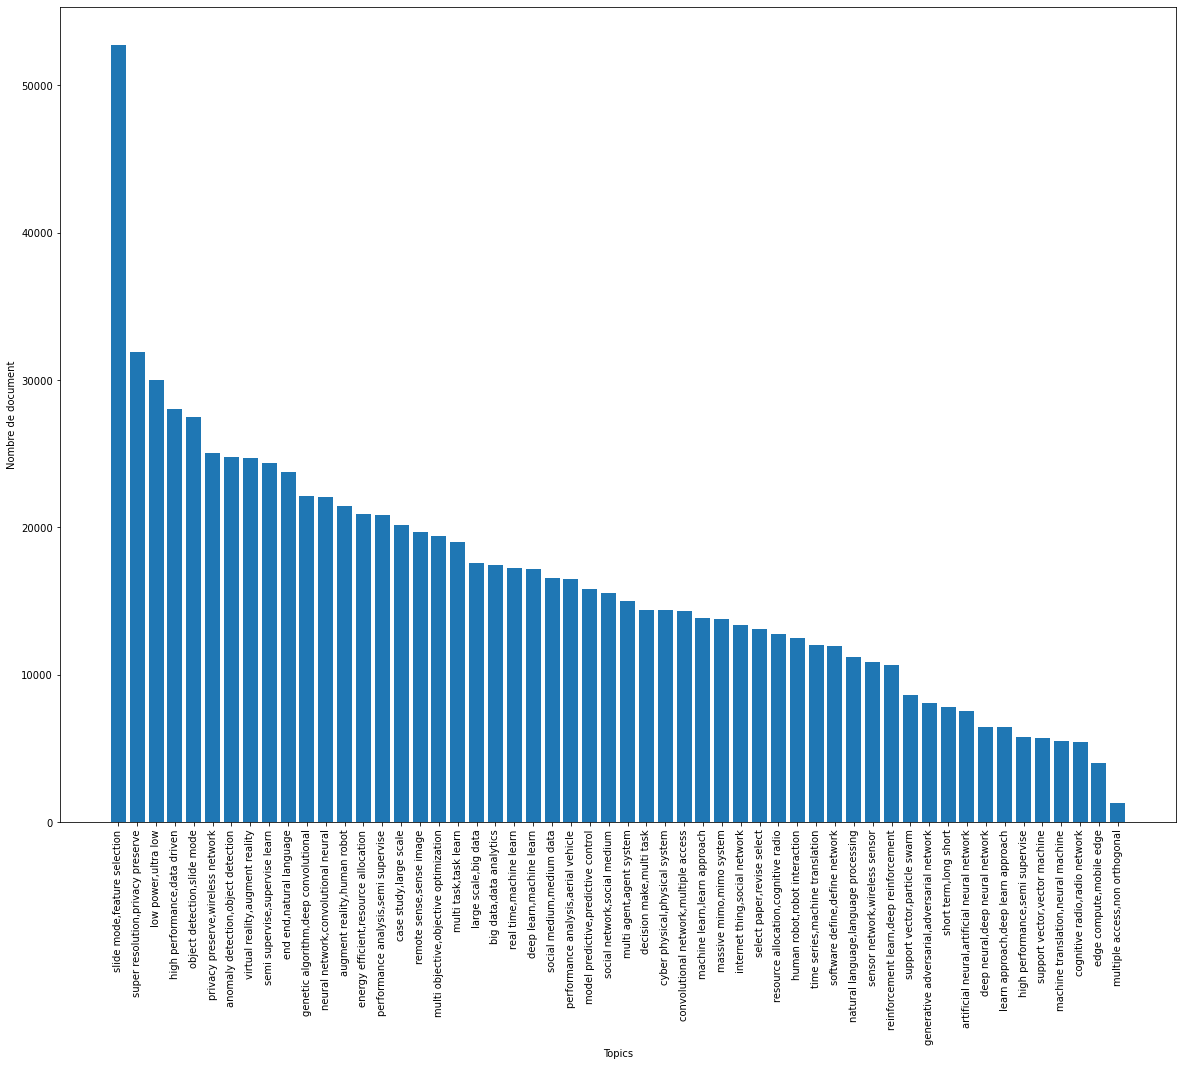

<Figure size 432x288 with 0 Axes>

In [185]:
import matplotlib.pyplot as plt

topics = list(sorted_topic_dict.keys())
values = list(sorted_topic_dict.values())
fig=plt.figure(figsize=(20,15)) # largeur, hauteur

plt.bar(topics,values)
plt.xlabel("Topics")
plt.ylabel("Nombre de document")
plt.xticks(rotation=90)
plt.show()
plt.savefig('D:/OneDrive/Universite/Master1/Semestre1/2.0___Projet_integre/data_cleaning/estimation_nombre_document_par_topic_countvectorizer.png')

### <span style="color:red"> Latent semantic analysis avec matrice tfidf (TfidfVectorizer)</span>

In [2]:
# Fonctions de sauvegarde et de chargement de dictionnaires avec des fichiers
# Utilisé pour gagner du temps afin de ne pas avoir à re-exécuter tout
# à chaque ré-ouverture

import pickle

def save_dict(dico, filename) :
    with open("dict/"+filename+".pickle", 'wb') as handle:
        pickle.dump(dico, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
def load_dict(filename) :
    with open("dict/"+filename+".pickle", 'rb') as handle:
        return(pickle.load(handle))

In [3]:
import pandas as pd
import numpy as np
from IPython.display import display

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
# TfidfVectorizer est équivalent à faire un CountVectorizer suivi d'un TfidTransformer

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [73]:
#article_titles = load_dict("cleaned") # dictionnaire tokénisé

In [9]:
#article_titles_str = []
#lst = list(article_titles.values())

#for i in lst:
#    a=" ".join([k for k in i])
#    article_titles_str.append(a)

In [ ]:
#save_dict(article_titles_str, "article_titles_str")

In [70]:
article_titles_str=load_dict("article_titles_str")

In [146]:
#matching = [s for s in article_titles_str if '' in s] # test de la présence du mot ..
#matching

In [80]:
article_titles_str[0:2]

['infer social link mobility profile',
 'real time arm skeleton track gesture inference tolerant miss wearable sensor']

In [6]:
#vectorizer= CountVectorizer(ngram_range(2,3))
vectorizer = TfidfVectorizer(ngram_range=(2,3)) # on va travailler uniquement sur les bigramms et trigramms car prit isolément, les mots n'ont pas vraiment de sens
#document_term_matrix = vectorizer(article_titles_str)
tfidf_matrix=vectorizer.fit_transform(article_titles_str) # matrice tfidf
dictionary = vectorizer.get_feature_names()

In [81]:
tfidf_matrix[0:12].todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
tfidf_matrix.shape # On a un total de n mots (bigrams + trigrams) pour 439506 documents 

(439506, 3174073)

In [27]:
#df = pd.DataFrame(bag_of_words[0:12].todense(), columns=names) # on peut visualiser le résultat sous la forme d'un data frame mais cela prend du temps

In [7]:
topic_number = 55 # On choisit arbitrairement un nombre de topic

In [8]:
svd = TruncatedSVD(n_components=topic_number) # on choisit ici le nombre de topics que l'on veut
lsa = svd.fit_transform(tfidf_matrix)

In [9]:
topic_col=[]
for i in range(topic_number):
    topic_col.append("topic_"+str(i+1))

In [10]:
topic_encoded_df = pd.DataFrame(lsa,columns=topic_col)

In [11]:
topic_encoded_df[0:3]

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,topic_30,topic_31,topic_32,topic_33,topic_34,topic_35,topic_36,topic_37,topic_38,topic_39,topic_40,topic_41,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49,topic_50,topic_51,topic_52,topic_53,topic_54,topic_55
0,0.000097,-0.000074,0.000014,0.000009,0.000012,-3.203240e-07,0.000011,-0.000023,0.000030,-2.946156e-07,0.000016,0.000667,-0.000154,-0.000072,0.000057,0.000009,0.000716,-0.000130,0.000084,-0.000028,-0.000082,3.619122e-07,-0.000012,-4.033342e-07,0.000037,-0.000020,1.535097e-05,0.000033,0.000232,0.000063,-0.000022,0.000202,0.000170,-0.000109,0.000290,0.000290,0.000021,-0.000305,0.000176,0.000208,-0.000103,0.000555,-0.000256,-0.000110,-0.000116,-0.000377,0.000005,0.000101,-0.000150,-0.000087,0.000222,0.000157,-0.000143,0.000007,-0.000013
1,0.001314,0.001744,0.004604,0.003917,0.003139,1.075342e-03,0.000659,0.002251,0.077654,-5.810650e-02,-0.000901,-0.005712,-0.005587,-0.001968,-0.003495,0.000075,-0.000149,-0.001686,-0.002797,-0.001157,-0.001962,3.158812e-05,-0.001410,-1.845040e-03,0.000630,0.000398,-1.209579e-07,-0.000961,-0.000472,-0.001555,-0.001768,0.000009,0.000351,0.000941,0.000102,-0.000438,0.000377,-0.000807,-0.001582,-0.001116,-0.002599,-0.000531,-0.001916,-0.000833,0.001831,-0.000649,0.001424,0.002341,-0.000924,-0.002582,-0.001933,0.000051,-0.000955,-0.001812,0.000550
2,0.000704,-0.000012,0.000773,0.001171,0.000013,1.100497e-03,-0.000301,-0.000090,0.002375,-1.820156e-03,0.000067,-0.000072,-0.000586,0.000052,0.000381,0.000337,-0.000842,0.000482,-0.000070,-0.000438,0.001408,-2.907330e-04,0.000952,2.555132e-03,-0.000445,0.000599,-2.117226e-03,0.003339,-0.000814,0.005096,0.005690,-0.001968,0.000071,0.001085,0.001603,0.000360,-0.002220,0.001659,0.003047,-0.000763,0.004634,0.001658,0.002338,-0.005470,0.004287,-0.000324,-0.002297,-0.008269,0.001572,0.000193,0.002415,0.001632,-0.000927,0.002503,-0.000915


In [12]:
topic_encoded_df["article_title"]=article_titles_str

In [13]:
topic_encoded_df=topic_encoded_df.set_index('article_title', drop=True)

In [14]:
#topic_encoded_df=topic_encoded_df[['article_title']+topic_col] #on réorganise les colonnes 

In [82]:
topic_encoded_df[0:2]

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,topic_30,topic_31,topic_32,topic_33,topic_34,topic_35,topic_36,topic_37,topic_38,topic_39,topic_40,topic_41,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49,topic_50,topic_51,topic_52,topic_53,topic_54,topic_55
article_title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
infer social link mobility profile,0.000097,-0.000074,0.000014,0.000009,0.000012,-3.203240e-07,0.000011,-0.000023,0.000030,-2.946156e-07,0.000016,0.000667,-0.000154,-0.000072,0.000057,0.000009,0.000716,-0.000130,0.000084,-0.000028,-0.000082,3.619122e-07,-0.000012,-4.033342e-07,0.000037,-0.000020,1.535097e-05,0.000033,0.000232,0.000063,-0.000022,0.000202,0.000170,-0.000109,0.000290,0.000290,0.000021,-0.000305,0.000176,0.000208,-0.000103,0.000555,-0.000256,-0.000110,-0.000116,-0.000377,0.000005,0.000101,-0.000150,-0.000087,0.000222,0.000157,-0.000143,0.000007,-0.000013
real time arm skeleton track gesture inference tolerant miss wearable sensor,0.001314,0.001744,0.004604,0.003917,0.003139,1.075342e-03,0.000659,0.002251,0.077654,-5.810650e-02,-0.000901,-0.005712,-0.005587,-0.001968,-0.003495,0.000075,-0.000149,-0.001686,-0.002797,-0.001157,-0.001962,3.158812e-05,-0.001410,-1.845040e-03,0.000630,0.000398,-1.209579e-07,-0.000961,-0.000472,-0.001555,-0.001768,0.000009,0.000351,0.000941,0.000102,-0.000438,0.000377,-0.000807,-0.001582,-0.001116,-0.002599,-0.000531,-0.001916,-0.000833,0.001831,-0.000649,0.001424,0.002341,-0.000924,-0.002582,-0.001933,0.000051,-0.000955,-0.001812,0.000550


In [16]:
topic_encoded_df.index[0]

'infer social link mobility profile'

In [17]:
encoding_matrix = pd.DataFrame(svd.components_,index=topic_col,columns=dictionary).T

In [84]:
encoding_matrix[0:3]

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,topic_30,topic_31,topic_32,topic_33,topic_34,topic_35,topic_36,topic_37,topic_38,topic_39,topic_40,topic_41,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49,topic_50,topic_51,topic_52,topic_53,topic_54,topic_55
0g lte,2.259416e-09,3.818726e-08,7.963224e-07,-4.126404e-07,7.603224e-08,-1.590747e-08,1.310491e-07,3.036565e-08,6.601029e-07,-1.926996e-07,-2.911676e-08,3.145932e-07,7.513812e-08,4.415206e-08,6.036049e-07,-5.349530e-07,-1.373702e-07,-4.448559e-07,2.175751e-07,-3.714035e-07,2.252506e-08,1.988529e-07,5.972510e-08,3.289872e-07,-1.778576e-08,-1.087718e-07,1.310427e-07,-8.496249e-08,-1.758835e-07,-1.055611e-08,-4.074349e-08,2.344163e-07,3.851851e-08,-1.217352e-07,3.739480e-07,7.968975e-08,-7.958704e-08,-2.382810e-07,-1.935196e-07,9.505586e-07,1.709662e-06,6.609265e-07,1.733144e-06,-1.089098e-06,7.802771e-07,8.261023e-08,-1.053201e-08,4.424399e-07,-1.133867e-06,5.217738e-09,-8.672066e-07,-6.612216e-07,1.467143e-07,1.440935e-06,-1.307339e-06
0g lte mobile,2.259416e-09,3.818733e-08,7.963224e-07,-4.126404e-07,7.603223e-08,-1.590747e-08,1.310491e-07,3.036568e-08,6.601029e-07,-1.926996e-07,-2.911676e-08,3.145932e-07,7.513812e-08,4.415204e-08,6.036049e-07,-5.349530e-07,-1.373702e-07,-4.448559e-07,2.175751e-07,-3.714035e-07,2.252506e-08,1.988529e-07,5.972511e-08,3.289872e-07,-1.778577e-08,-1.087718e-07,1.310427e-07,-8.496248e-08,-1.758834e-07,-1.055617e-08,-4.074344e-08,2.344163e-07,3.851852e-08,-1.217352e-07,3.739480e-07,7.968975e-08,-7.958705e-08,-2.382811e-07,-1.935196e-07,9.505585e-07,1.709662e-06,6.609265e-07,1.733144e-06,-1.089098e-06,7.802770e-07,8.261023e-08,-1.053198e-08,4.424399e-07,-1.133867e-06,5.217733e-09,-8.672066e-07,-6.612216e-07,1.467143e-07,1.440935e-06,-1.307339e-06
0g search,2.930119e-10,6.006367e-09,4.024837e-08,6.415399e-08,-2.719650e-08,2.076444e-10,-2.271140e-08,7.749653e-10,-3.582771e-09,6.605217e-09,1.311252e-09,-4.411230e-10,-1.151987e-09,-1.139167e-08,5.297767e-10,-6.089380e-09,-1.643336e-10,-2.019684e-08,-7.652920e-09,1.035611e-08,1.420192e-08,-3.132738e-11,-3.696645e-09,-2.575161e-08,-8.401126e-08,-1.075689e-08,-5.298211e-08,4.004473e-08,1.161777e-08,-3.219072e-08,1.260344e-08,6.785796e-09,-2.421445e-09,4.426089e-09,-4.607620e-09,1.218370e-08,-5.163707e-09,3.142452e-08,-6.276279e-08,3.064545e-08,-1.456198e-08,-1.824340e-09,4.536805e-08,-8.199514e-09,-6.500666e-11,-6.291797e-08,4.907484e-08,-1.788184e-08,-1.080899e-07,-1.655696e-07,1.099150e-08,-2.354651e-07,-1.655841e-07,6.331906e-07,-2.742065e-07


In [142]:
topic_list=[]
detailed_topic_dict={}
for i in range(topic_number):
    n_topic="topic_"+str(i+1)
    #print(n_topic+" :\n")
    temp = encoding_matrix[n_topic].sort_values(ascending=False).iloc[0:10] # On trie par valeur décroissante les valeurs qui désignent le mieux un topics et donc les mots
    
    detailed_topic_dict[n_topic]=temp.index.values.tolist()
    topic_list.append(temp.index.values[0:2].tolist()) # On récupère les deux premiers index de la série issue du tri décroissant
    #print(temp)
    #print("\n")

In [143]:
detailed_topic_dict 

{'topic_1': ['neural network',
  'convolutional neural',
  'convolutional neural network',
  'deep neural network',
  'deep neural',
  'deep convolutional neural',
  'deep convolutional',
  'recurrent neural',
  'recurrent neural network',
  'artificial neural network'],
 'topic_2': ['deep neural',
  'deep neural network',
  'neural network',
  'recurrent neural',
  'recurrent neural network',
  'deep learn',
  'artificial neural',
  'artificial neural network',
  'machine learn',
  'training deep neural'],
 'topic_3': ['sensor network',
  'wireless sensor',
  'deep learn',
  'wireless sensor network',
  'machine learn',
  'learn approach',
  'deep learn approach',
  'reinforcement learn',
  'energy efficient',
  'real time'],
 'topic_4': ['deep learn',
  'learn approach',
  'machine learn',
  'deep learn approach',
  'learn model',
  'reinforcement learn',
  'deep learn model',
  'machine learn approach',
  'detection deep learn',
  'detection deep'],
 'topic_5': ['reinforcement learn

In [91]:
topic_str=topic_list.copy()
for i in range(len(topic_list.copy())):
    topic_str[i] = ','.join(topic_str[i])

In [93]:
topic_str[0:2]

['neural network,convolutional neural', 'deep neural,deep neural network']

In [96]:
new_topic_df=topic_encoded_df.copy()
new_topic_df.columns=topic_str # on change le nom des columns de topics avec les mots les plus reliés

In [105]:
new_topic_df.index[0] # nom du premier document

'infer social link mobility profile'

In [114]:
new_topic_df.iloc[0].sort_values(ascending=False)[0:1] # affiche pour un document donné (ici 'infer social link..'') le nom du topic le plus proche selon les valeurs du df

social network,online social    0.000716
Name: infer social link mobility profile, dtype: float64

In [115]:
new_topic_df.iloc[1].sort_values(ascending=False)[0:1]

real time,cyber physical    0.077654
Name: real time arm skeleton track gesture inference tolerant miss wearable sensor, dtype: float64

In [116]:
new_topic_df.iloc[2].sort_values(ascending=False)[0:1]

artificial neural,artificial neural network    0.00569
Name: online semantic segmentation manipulation object task intelligence service robot, dtype: float64

In [117]:
new_topic_df.iloc[3].sort_values(ascending=False)[0:1]

neural network,convolutional neural    0.100764
Name: computational awareness learn neural network ensemble, dtype: float64

In [118]:
new_topic_df.iloc[4].sort_values(ascending=False)[0:1]

privacy preserve,energy efficient    0.001015
Name: coresets logistic regression, dtype: float64

In [135]:
for i in range(0,20):
    print(new_topic_df.index[i]+": "+new_topic_df.iloc[i].sort_values(ascending=False).index[0]) # affiche le titre du document 
    #print(new_topic_df.iloc[0].sort_values(ascending=False).index[0]) # il s'agit d'une série

infer social link mobility profile: social network,online social
real time arm skeleton track gesture inference tolerant miss wearable sensor: real time,cyber physical
online semantic segmentation manipulation object task intelligence service robot: artificial neural,artificial neural network
computational awareness learn neural network ensemble: neural network,convolutional neural
coresets logistic regression: privacy preserve,energy efficient
dexterity dimension optimization muti dof robotic manipulator: privacy preserve,energy efficient
mobility driven ble transmit power adaptation participatory data muling: massive mimo,mimo system
encode word matrix matrix multiplication composition function: privacy preserve,energy efficient
model exploration strategy predict student performance learn environment: support vector,vector machine
network restructuring control conic invariance application neural network: neural network,convolutional neural
high performance graphic racket directx: low

In [137]:
topic_dict=dict.fromkeys(topic_str)
for key in topic_dict:
    topic_dict[key]=0

In [26]:
pred_topic_dict=dict(zip(topic_col,topic_str)) # topic 1 : blabla

In [138]:
for i in range(len(new_topic_df)):
    key=new_topic_df.iloc[i].sort_values(ascending=False).index[0]
    topic_dict[key]+=1

In [64]:
#for index,row in topic_encoded_df.iterrows():
#    a=row.sort_values(ascending=False)
#    temp=a[0:1].index.tolist()
#    temp = ''.join(temp)
#    key=pred_topic_dict[temp]
#    topic_dict[key]+=1

In [139]:
sorted_topic_dict = dict(sorted(topic_dict.items(),key=lambda item: item[1],reverse=True))

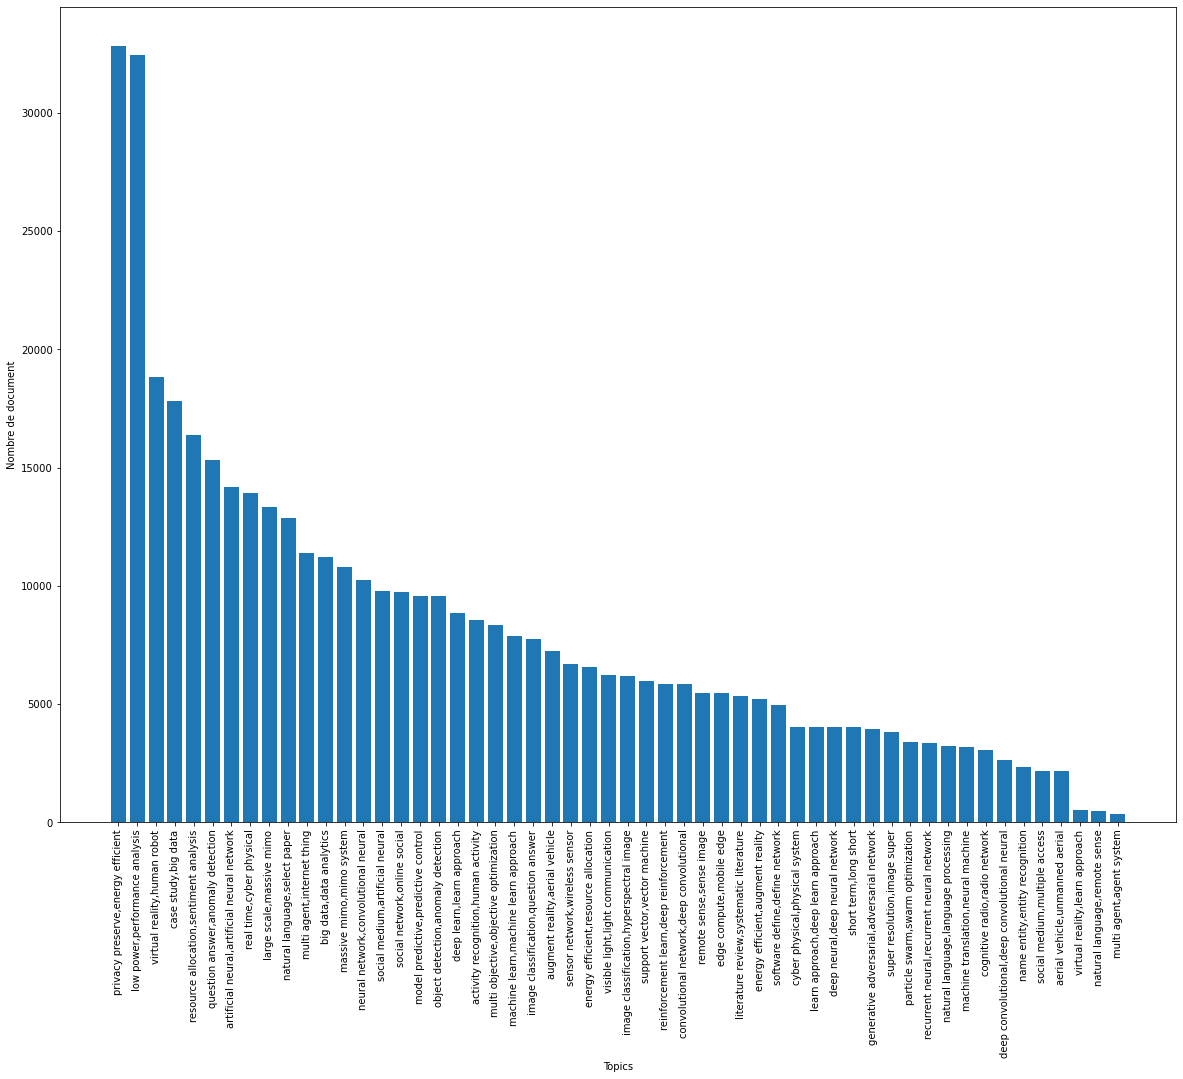

In [140]:
import matplotlib.pyplot as plt

topics = list(sorted_topic_dict.keys())
values = list(sorted_topic_dict.values())
fig=plt.figure(figsize=(20,15)) # largeur, hauteur

plt.bar(topics,values)
plt.xlabel("Topics")
plt.ylabel("Nombre de document")
plt.xticks(rotation=90)
plt.show()

### <span style="color:red"> Latent semantic analysis avec gensim</span>

In [5]:
from gensim import corpora, models, similarities
from gensim.models.phrases import Phrases, Phraser

In [6]:
article_titles = load_dict("cleaned") # dictionnaire tokénisé

In [15]:
texts = list(article_titles.values())

In [16]:
texts[0:2]

[['infer', 'social', 'link', 'mobility', 'profile'],
 ['real',
  'time',
  'arm',
  'skeleton',
  'track',
  'gesture',
  'inference',
  'tolerant',
  'miss',
  'wearable',
  'sensor']]

In [17]:
texts_str = []

for i in texts:
    a=" ".join([k for k in i])
    texts_str.append(a)

In [25]:
bigram = Phrases(texts)
texts = [bigram[line] for line in texts]

Phrases<1219662 vocab, min_count=5, threshold=10.0, max_vocab_size=40000000>


In [21]:
token_ = [doc.split(" ") for doc in texts_str]

bigram = Phrases(token_, delimiter=b' ')
trigram = Phrases(bigram[token_], delimiter=b' ')



#for sent in sentence_stream:
#    bigrams_ = [b for b in bigram[sent] if b.count(' ') == 1]
#    trigrams_ = [t for t in trigram[bigram[sent]] if t.count(' ') == 2]

In [22]:
bigram_phraser = Phraser(bigram)
bigram_token = []
for sent in token_:
    bigram_token.append(bigram_phraser[sent])

In [23]:
bigram_token

[['infer', 'social', 'link', 'mobility', 'profile'],
 ['real time',
  'arm',
  'skeleton',
  'track',
  'gesture',
  'inference',
  'tolerant',
  'miss',
  'wearable sensor'],
 ['online',
  'semantic segmentation',
  'manipulation',
  'object',
  'task',
  'intelligence',
  'service',
  'robot'],
 ['computational', 'awareness', 'learn', 'neural network', 'ensemble'],
 ['coresets', 'logistic regression'],
 ['dexterity',
  'dimension',
  'optimization',
  'muti',
  'dof robotic',
  'manipulator'],
 ['mobility',
  'driven',
  'ble',
  'transmit power',
  'adaptation',
  'participatory',
  'data',
  'muling'],
 ['encode',
  'word',
  'matrix',
  'matrix multiplication',
  'composition',
  'function'],
 ['model',
  'exploration',
  'strategy',
  'predict',
  'student',
  'performance',
  'learn',
  'environment'],
 ['network',
  'restructuring',
  'control',
  'conic',
  'invariance',
  'application',
  'neural network'],
 ['high performance', 'graphic', 'racket', 'directx'],
 ['horizontal'

In [313]:
bigram = Phrases(texts, min_count=1,delimiter=b' ')

In [300]:
bigram_phraser=Phraser(bigram)

In [316]:
for sent in texts:
    bigrams_=[b for b in bigram[sent] if b.count(' ') == 1]
    trigrams_ = [t for t in trigram[bigram[sent]] if t.count(' ') == 2]

In [302]:
bigram_token

[['infer social', 'link', 'mobility', 'profile'],
 ['real time',
  'arm',
  'skeleton track',
  'gesture',
  'inference',
  'tolerant',
  'miss',
  'wearable sensor'],
 ['online',
  'semantic segmentation',
  'manipulation',
  'object',
  'task',
  'intelligence',
  'service robot'],
 ['computational', 'awareness', 'learn', 'neural network', 'ensemble'],
 ['coresets', 'logistic regression'],
 ['dexterity',
  'dimension',
  'optimization',
  'muti',
  'dof robotic',
  'manipulator'],
 ['mobility',
  'driven',
  'ble',
  'transmit power',
  'adaptation',
  'participatory',
  'data muling'],
 ['encode',
  'word',
  'matrix matrix',
  'multiplication',
  'composition',
  'function'],
 ['model',
  'exploration strategy',
  'predict student',
  'performance',
  'learn',
  'environment'],
 ['network',
  'restructuring',
  'control conic',
  'invariance',
  'application',
  'neural network'],
 ['high performance', 'graphic', 'racket', 'directx'],
 ['horizontal', 'fat', 'mesh', 'interconnection

In [ ]:
# Création d'un dictionnaire

In [266]:
dictionary = corpora.Dictionary(texts)

In [269]:
print (dictionary)

Dictionary(57514 unique tokens: ['infer', 'link', 'mobility', 'profile', 'social']...)


In [270]:
print (dictionary.token2id)

{'infer': 0, 'link': 1, 'mobility': 2, 'profile': 3, 'social': 4, 'arm': 5, 'gesture': 6, 'inference': 7, 'miss': 8, 'real': 9, 'sensor': 10, 'skeleton': 11, 'time': 12, 'tolerant': 13, 'track': 14, 'wearable': 15, 'intelligence': 16, 'manipulation': 17, 'object': 18, 'online': 19, 'robot': 20, 'segmentation': 21, 'semantic': 22, 'service': 23, 'task': 24, 'awareness': 25, 'computational': 26, 'ensemble': 27, 'learn': 28, 'network': 29, 'neural': 30, 'coresets': 31, 'logistic': 32, 'regression': 33, 'dexterity': 34, 'dimension': 35, 'dof': 36, 'manipulator': 37, 'muti': 38, 'optimization': 39, 'robotic': 40, 'adaptation': 41, 'ble': 42, 'data': 43, 'driven': 44, 'muling': 45, 'participatory': 46, 'power': 47, 'transmit': 48, 'composition': 49, 'encode': 50, 'function': 51, 'matrix': 52, 'multiplication': 53, 'word': 54, 'environment': 55, 'exploration': 56, 'model': 57, 'performance': 58, 'predict': 59, 'strategy': 60, 'student': 61, 'application': 62, 'conic': 63, 'control': 64, 'inva

In [ ]:
# Création d'un bag of words

In [271]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [273]:
print(corpus[0:2])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]]


In [275]:
# Création d'une matrice tfidf

tfidf = models.TfidfModel(corpus)
corpus_tfidf=tfidf[corpus]

In [283]:
from gensim.models import LsiModel
lsi = LsiModel(corpus_tfidf, id2word=dictionary, num_topics=55)
corpus_lsi=lsi[corpus_tfidf]

In [282]:
lsi.print_topics(2)

[(0,
  '0.360*"network" + 0.294*"learn" + 0.213*"neural" + 0.199*"deep" + 0.191*"model" + 0.172*"data" + 0.144*"multi" + 0.142*"detection" + 0.129*"image" + 0.129*"analysis"'),
 (1,
  '-0.488*"network" + -0.448*"neural" + -0.273*"convolutional" + -0.222*"deep" + 0.198*"system" + 0.194*"data" + 0.164*"model" + 0.123*"control" + 0.122*"design" + -0.106*"image"')]